### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Read data

In [3]:
df = pd.read_csv('data/iris.csv')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


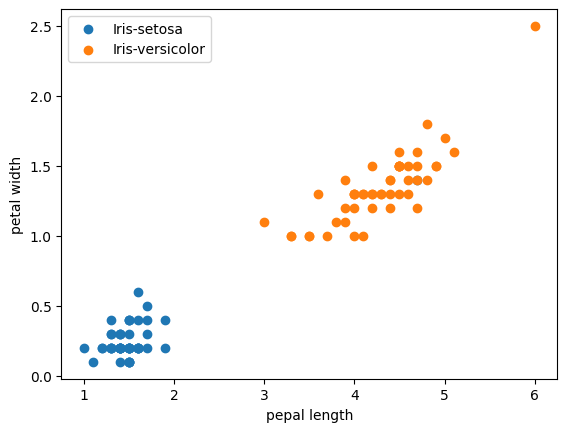

In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [2, 3]].values

plt.scatter(X[:50, 0], X[:50, 1], label='Iris-setosa')
plt.scatter(X[50:, 0], X[50:, 1], label='Iris-versicolor')
plt.xlabel('pepal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

### Standardization

In [5]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

### Logistic Regression
- The odds: $\frac{p}{1-p}$, where $p$ stands for the probability of the possitive event or the event that will be predicted.
- *Logit* function - logarithm of the odds (log-odds) $logit(p) = log\frac{p}{1-p}$, it takes input as values in range 0 to 1 and turns them to the entire real-number range
- In statistics, the logistic model - logit model  is a model that models the log-odds as linear combination of one or more variables (weighted inputs):
$$ logit(p) = w_1x_1+ ... + w_mx_m + b $$
- The probability $p$ is what we are interested in => inverse the logit function to find $p$, therefore *sigmoid function* is used, this function is continous differentiable
$$ \sigma(z)=\frac{1}{1+e^{-z}} $$
- Therefore, given the all features $x$, weights and bias $w$ and $b$, the probablity of an instance belonging to class 1 is $\sigma(z) = p(y=1|x;w;b)$, and for class 0 is $p(y=0|x;w;b)=1-p(y=1|x;w;b)$
- Assuming that all examples in the dataset are independent of one another, we need to maximize the likelihood 
$$L(w,b|x)=p(y|x;w,b)=\prod_{i=1}^n p(y^{(i)}|x^{(i)};w,b)=\prod_{i=1}^n (\sigma(z^{(i)}))^{y^{(i)}}(1-\sigma(z^{(i)}))^{1-y^{(i)}} $$
- Logarith both 2 sides to turn product to sum and reduce the underflow when the likelihoods are small
$$ log (L(w,b|x)) = \sum_{i=1} [y^{(i)} log(\sigma(z^{(i)})) + (1-y^{(i)}) log(1-\sigma(z^{(i)}))] $$
- Loss function for Logistic Regression (to maximize the likelihood we need to minimize the loss)
$$ L(w,b) = -\sum_{i=1}^n [y^{(i)} log(\sigma(z^{(i)})) + (1-y^{(i)}) log(1-\sigma(z^{(i)}))] $$
- Using gradient descent, we calculate the derivative for each weight and update them:
$$ w_j = w_j - \alpha (\sigma(z)-y)x_i $$
$$ b = b - \alpha (\sigma(z)-y) $$

In [9]:
class LogisticRegression:
    def __init__(self, learning_rate, num_iters, random_state):
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.random_state = random_state
        
    def fit(self, X, y):
        self.w = np.random.RandomState(self.random_state).normal(loc=0, scale=0.01, size=X.shape[1])
        self.b = np.float64(0)
        self.losses = []
        
        for i in range(self.num_iters):
            z = np.dot(X, self.w) + self.b
            y_pred = self.activation(z)
            self.w += self.learning_rate * np.dot(X.T, y - y_pred) / X.shape[0]
            self.b += self.learning_rate * np.sum(y - y_pred) / X.shape[0]
            loss = (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()
            self.losses.append(loss)
        return self
            
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X):
        return np.where(self.activation(np.dot(X, self.w) + self.b) >= 0.5, 1, 0)

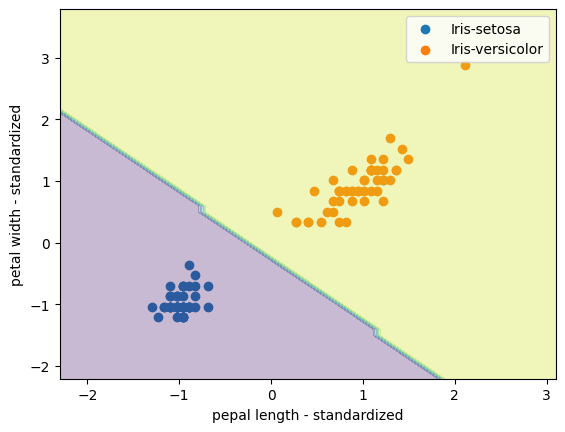

In [10]:
lr = LogisticRegression(learning_rate=0.3, num_iters=1000, random_state=1)
lr.fit(X_std, y)

# plot decision regions
plt.scatter(X_std[:50, 0], X_std[:50, 1], label='Iris-setosa')
plt.scatter(X_std[50:, 0], X_std[50:, 1], label='Iris-versicolor')
x1_min, x1_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
x2_min, x2_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = lr.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.xlabel('pepal length - standardized')
plt.ylabel('petal width - standardized')
plt.legend()
plt.show()

### Logistic Regression using Sklearn

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [16]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

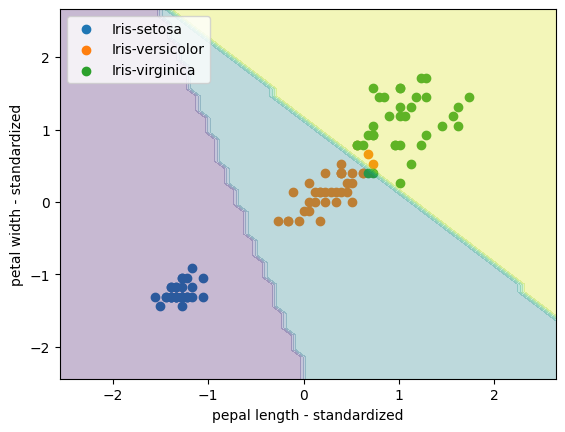

In [26]:
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

# plot decision regions
plt.scatter(X_train_std[y_train == 0, 0], X_train_std[y_train == 0, 1], label='Iris-setosa')
plt.scatter(X_train_std[y_train == 1, 0], X_train_std[y_train == 1, 1], label='Iris-versicolor')
plt.scatter(X_train_std[y_train == 2, 0], X_train_std[y_train == 2, 1], label='Iris-virginica')
x1_min, x1_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
x2_min, x2_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = lr.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.xlabel('pepal length - standardized')
plt.ylabel('petal width - standardized')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.9777777777777777